In [24]:
import pandas as pd 
import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import mean_squared_error

Using data from [this guide](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)


In [8]:
#create a parser for the time
def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')

In [9]:
#reading in data and parsing it into correct datetime format

shampoo_df = pd.read_csv('shampoo.csv',header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(shampoo_df)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64


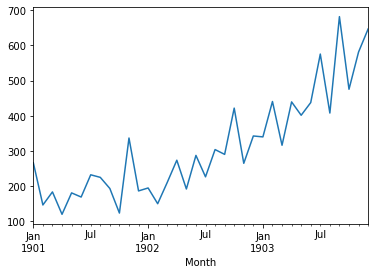

In [10]:
#plottin the data
shampoo_df.plot()
plt.show()


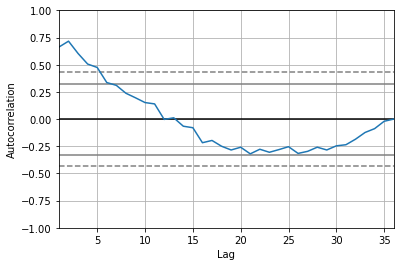

In [11]:
#auto-correlation plot
autocorrelation_plot(shampoo_df)
plt.show()

#some lag here and starts with positive correlation at lag-1 so will just start (1,1,0) for the order to see what happens

In [13]:
# fitting model
model = ARIMA(shampoo_df, order=(1,1,0))
model_fit = model.fit()

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Sat, 09 Jul 2022   AIC                            406.575
Time:                        22:00:09   BIC                            409.686
Sample:                    01-01-1901   HQIC                           407.649
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4514   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

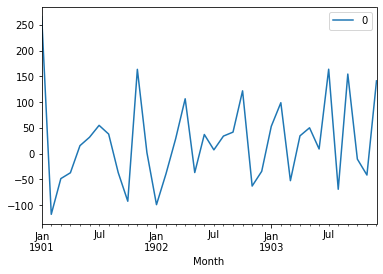

In [15]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

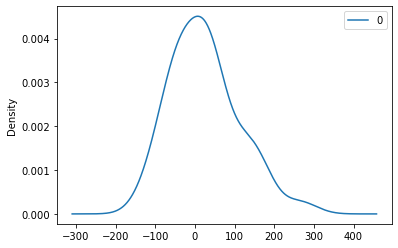

In [16]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [17]:
# summary stats of residuals
print(residuals.describe())

                0
count   36.000000
mean    24.285452
std     85.397407
min   -117.921085
25%    -37.623038
50%     22.017200
75%     53.443456
max    266.000000


In [18]:
#Now will do that again but with train test split

In [34]:
#indexing
shampoo_df.index = shampoo_df.index.to_period('M')

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [89]:
# split into train and test sets
X = shampoo_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

#keeping a history
history = [x for x in train]

#empty predictions list
predictions = list()

In [47]:
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=603.627050, expected=342.300000
predicted=549.569643, expected=339.700000
predicted=341.270748, expected=440.400000
predicted=379.530147, expected=315.900000
predicted=392.109428, expected=439.300000
predicted=362.906893, expected=401.300000
predicted=424.626454, expected=437.400000
predicted=415.213406, expected=575.500000
predicted=491.571306, expected=407.600000
predicted=511.806458, expected=682.000000
predicted=503.401955, expected=475.300000
predicted=611.439961, expected=581.300000
predicted=512.092267, expected=646.900000


In [26]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#want a small rmse

Test RMSE: 88.631


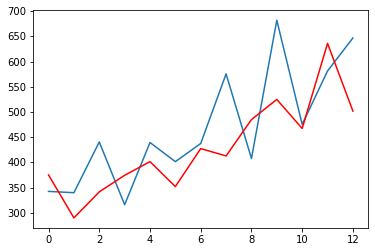

In [27]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [28]:
#not great lets try messing with the orders (p,d,q) comparing with the (1,1,0)

In [124]:
# split into train and test sets
X = shampoo_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

#keeping a history
history = [x for x in train]

#empty predictions list
predictions = list()

In [125]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=412.454735, expected=342.300000
predicted=333.354899, expected=339.700000
predicted=407.702236, expected=440.400000
predicted=370.233930, expected=315.900000
predicted=387.529797, expected=439.300000
predicted=370.118280, expected=401.300000
predicted=488.689235, expected=437.400000
predicted=414.513018, expected=575.500000
predicted=493.071859, expected=407.600000
predicted=559.475817, expected=682.000000
predicted=515.134212, expected=475.300000
predicted=708.230802, expected=581.300000
predicted=604.604730, expected=646.900000


In [126]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 79.898


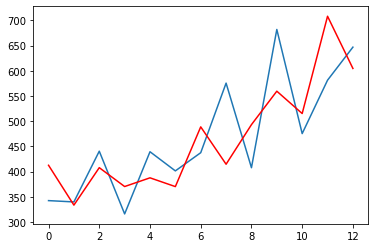

In [127]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()